## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

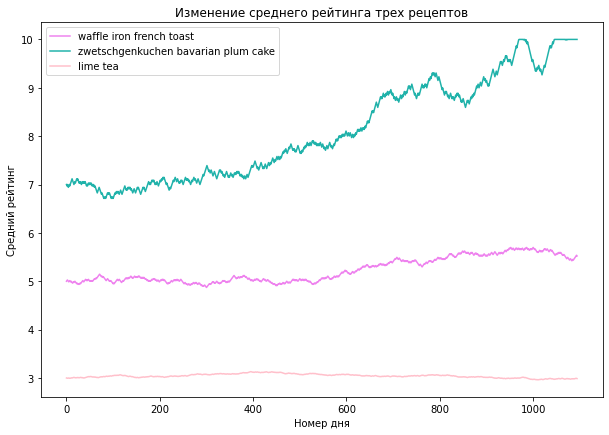

In [147]:
table = np.load(r'/Users/bshkrrr/Downloads/тод/лр5/average_ratings.npy')

y1 = table[0]
y2 = table[1]
y3 = table[2]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.3, 1.3])

y1_line, = ax.plot(y1, 'violet', label = 'waffle iron french toast')
y2_line, = ax.plot(y2, 'lightseagreen', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(y3, 'pink', label = 'lime tea')

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.legend(handles = [y1_line, y2_line, y3_line], loc = 'upper left')
ax.set_title('Изменение среднего рейтинга трех рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

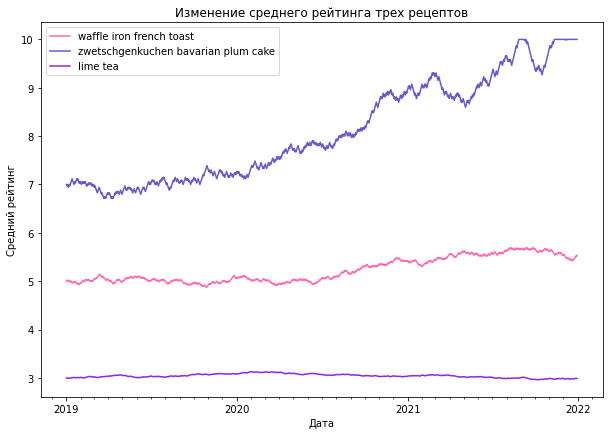

In [8]:
from matplotlib.ticker import MultipleLocator, IndexLocator, FixedLocator
import matplotlib.dates as mdates

x = pd.date_range(start = '2019/01/01', end = '2021/12/30')

fig = plt.figure()
ax2 = fig.add_axes([0.1, 0.1, 1.3, 1.3])

y1_line, = ax2.plot(x, y1, 'hotpink', label = 'waffle iron french toast')
y2_line, = ax2.plot(x, y2, 'slateblue', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax2.plot(x, y3, 'blueviolet', label = 'lime tea')

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_minor_locator(mdates.MonthLocator())

ax2.set_xlabel('Дата')
ax2.set_ylabel('Средний рейтинг')
ax2.legend(handles = [y1_line, y2_line, y3_line], loc = 'upper left')
ax2.set_title('Изменение среднего рейтинга трех рецептов')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

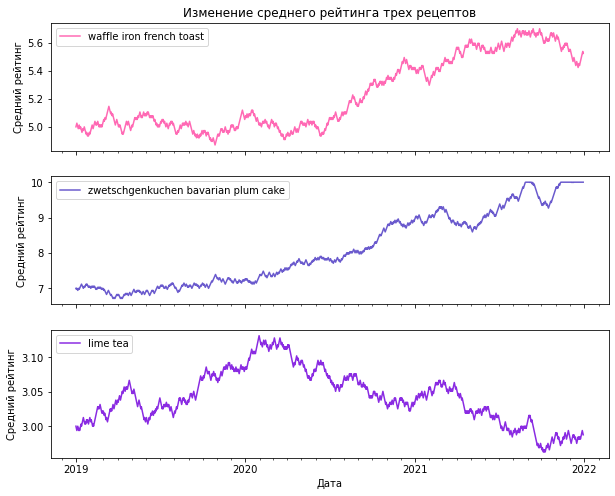

In [9]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(10, 8)
    
axes[0].plot(x, y1, 'hotpink')
axes[1].plot(x, y2, 'slateblue')
axes[2].plot(x, y3, 'blueviolet')
    
for ax in axes:
    
    ax.set_ylabel('Средний рейтинг')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xlabel('Дата')
axes[0].set_title('Изменение среднего рейтинга трех рецептов')

axes[0].legend(labels = ['waffle iron french toast'], loc = 'upper left')
axes[1].legend(labels = ['zwetschgenkuchen bavarian plum cake'], loc = 'upper left')
axes[2].legend(labels = ['lime tea'], loc = 'upper left')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

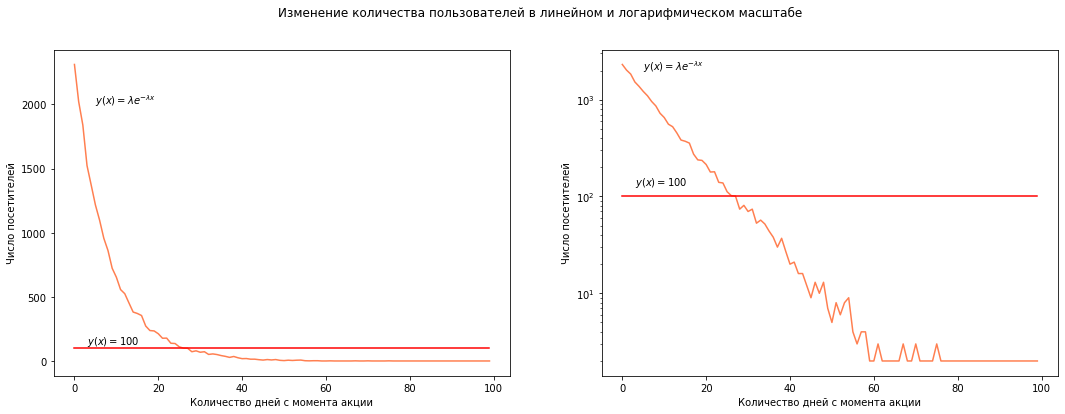

In [26]:
visitors = np.load(r'/Users/bshkrrr/Downloads/тод/лр5/visitors.npy')
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18, 6)
y2 = [100 for i in range(len(visitors))]


for ax in axes:
    
    ax.plot(visitors, 'coral')
    ax.text(5, 2000, '$y(x)=\lambda e^{-\lambda x}$')
    ax.plot(y2, 'r')
    ax.text(3, 130, '$y(x)=100$')
    ax.set_xlabel('Количество дней с момента акции')
    ax.set_ylabel('Число посетителей')
    
axes[1].set_yscale("log")
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [279]:
reviews = pd.read_csv(r'/Users/bshkrrr/Downloads/тод/лр5/reviews_sample.csv',delimiter = ',')
recipes = pd.read_csv(r'/Users/bshkrrr/Downloads/тод/лр5/recipes_sample.csv',delimiter = ',')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0, 0.5, 'Средняя длительность')

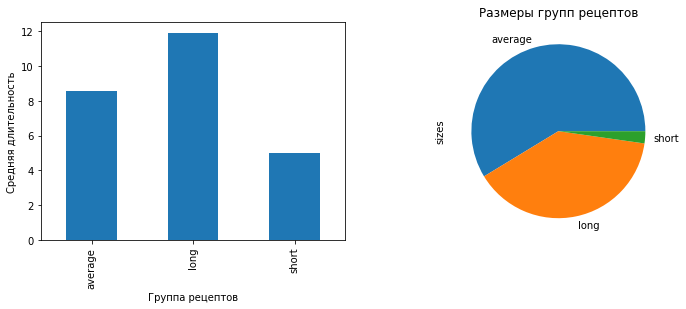

In [138]:
recipes = recipes.assign(type = '-')

recipes.loc[recipes['minutes'] < 5, 'type'] = 'short'
recipes.loc[recipes['minutes'] >= 50, 'type'] = 'long'
recipes.loc[recipes['type'] == '-', 'type'] = 'average'

average_steps = recipes.groupby("type").mean()
size_fo_group = recipes.groupby("type").size()
average_steps = average_steps['n_steps']

new_table = pd.concat([average_steps, size_fo_group], axis=1)
new_table.columns = ['n_steps', 'sizes']

fig, axes = plt.subplots(1, 2, figsize = (12, 4))
new_table.n_steps.plot(ax = axes[0], kind = "bar", x = new_table.index)
new_table.sizes.plot(ax = axes[1], kind='pie') 

axes[1].set_title('Размеры групп рецептов')
axes[0].set_xlabel('Группа рецептов')
axes[0].set_ylabel('Средняя длительность')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

/var/folders/xn/90wwbdyn2_3_49xc9kd3l5s40000gn/T/ipykernel_30369/276548090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews2008['date'] = reviews2008['date'].dt.year
/var/folders/xn/90wwbdyn2_3_49xc9kd3l5s40000gn/T/ipykernel_30369/276548090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews2009['date'] = reviews2009['date'].dt.year


Text(0, 0.5, 'amount')

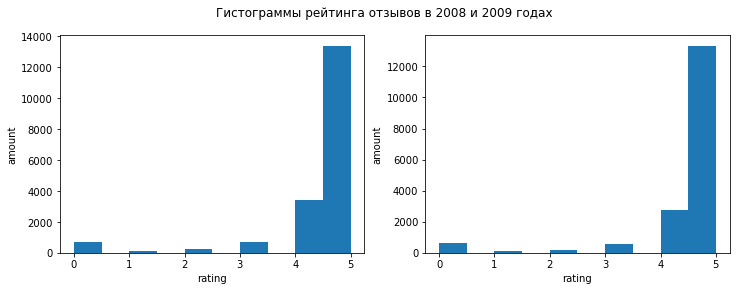

In [281]:
reviews['date'] = pd.to_datetime(reviews.date, format = '%Y/%m/%d')

reviews2008 = reviews[reviews['date'].dt.year == 2008]
reviews2009 = reviews[reviews['date'].dt.year == 2009]

reviews2008['date'] = reviews2008['date'].dt.year
reviews2009['date'] = reviews2009['date'].dt.year

fig, axes = plt.subplots(1, 2, figsize = (12, 4))

reviews2008.rating.plot.hist(ax = axes[0], column = 'rating')
reviews2009.rating.plot.hist(ax = axes[1], column = 'rating')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
axes[0].set_xlabel('rating')
axes[0].set_ylabel('amount')
axes[1].set_xlabel('rating')
axes[1].set_ylabel('amount')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

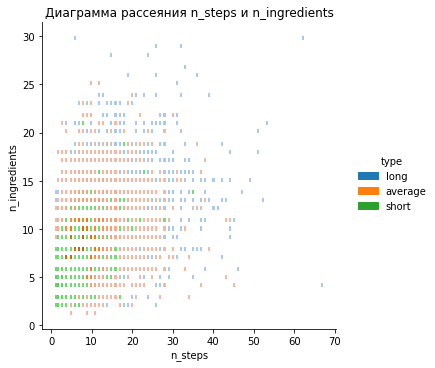

In [35]:
tab = sns.displot(recipes, x ="n_steps", y = "n_ingredients", hue = 'type').set(title='Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

[Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')]

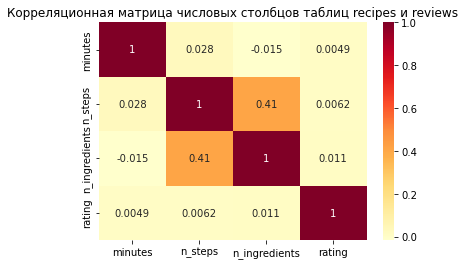

In [80]:
table = pd.concat((reviews, recipes), axis = 1)
table = table[["minutes", "n_steps", "n_ingredients", "rating"]]

matrix = table.corr()
sns.heatmap(table.corr(), annot = True, cmap = 'YlOrRd').set(title='Корреляционная матрица числовых столбцов таблиц recipes и reviews')